In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
us_house_price_df = pd.read_csv("US_Housing_Trends.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,PER_CAPITA_GDP,working_age_pop,Houses,CPI,UNRATE,EMP_RATE,Cons_Material,FEDFUNDS,% Urban population,Num_Households,median_income,Subsidy,% old_age_pop
DATE,,,,,,,,,,,,,,,,
2004-01-01,141.647,2004,1,52179.000000,187567500.0,3.8,186.3,5.7,71.26121,150.0,1.00,79.757,112000.0,65760.0,27.201,12.304719
2004-02-01,143.192,2004,2,52275.666667,187830600.0,3.7,186.7,5.6,71.20414,153.4,1.01,79.757,112000.0,65760.0,27.201,12.304719
2004-03-01,145.058,2004,3,52372.333333,188108000.0,3.6,187.1,5.8,71.04634,156.5,1.00,79.757,112000.0,65760.0,27.201,12.304719
2004-04-01,146.592,2004,4,52469.000000,188336800.0,4.0,187.4,5.6,71.19504,160.1,1.00,79.757,112000.0,65760.0,27.201,12.304719
2004-05-01,148.186,2004,5,52591.000000,188539500.0,3.8,188.2,5.6,71.14265,162.7,1.00,79.757,112000.0,65760.0,27.201,12.304719


In [ ]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

Exploratory Data Analysis

In [ ]:
# Summary statistics
us_house_price_df.describe()

,CSUSHPISA,PER_CAPITA_GDP,working_age_pop,Houses,CPI,UNRATE,EMP_RATE,Cons_Material,FEDFUNDS,% Urban population,Num_Households,median_income,Subsidy,% old_age_pop
count,228.000000,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,183.116000,57706.078947,2.008464e+08,6.256579,232.445329,6.011404,69.408665,216.311632,1.310789,81.349526,121874.263158,69085.789474,35.137842,14.121979
std,40.828751,3821.717454,5.509345e+06,1.935092,26.017227,2.089485,2.068878,43.017225,1.618934,1.008017,5806.601889,4638.176745,5.807508,1.516730
min,136.531000,52179.000000,1.875675e+08,3.300000,186.300000,3.500000,60.171120,150.000000,0.050000,79.757000,112000.000000,63350.000000,27.201000,12.304719
25%,151.464000,54599.750000,1.969411e+08,4.975000,213.374250,4.500000,67.489205,189.275000,0.117500,80.438000,116783.000000,65740.000000,29.876000,12.670858
50%,174.614500,56212.333333,2.023046e+08,5.600000,232.918500,5.350000,69.675185,209.200000,0.375000,81.299000,122459.000000,67520.000000,33.806000,13.891076
75%,200.139750,60715.666667,2.056487e+08,7.300000,249.739500,7.525000,71.262653,231.525000,2.062500,82.256000,127586.000000,73030.000000,38.859000,15.397698
max,304.468000,65997.000000,2.075878e+08,12.200000,298.812000,14.800000,72.315600,353.015000,5.260000,83.084000,131202.000000,78250.000000,48.021000,17.128121


In [ ]:
# Correlation matrix
correlation_mat = us_house_price_df.corr()
correlation_mat

,CSUSHPISA,PER_CAPITA_GDP,working_age_pop,Houses,CPI,UNRATE,EMP_RATE,Cons_Material,FEDFUNDS,% Urban population,Num_Households,median_income,Subsidy,% old_age_pop
CSUSHPISA,1.000000,0.889292,0.525305,0.057325,0.788705,-0.526177,0.365367,0.881160,0.133692,0.744169,0.695859,0.832737,0.815287,0.821203
PER_CAPITA_GDP,0.889292,1.000000,0.808710,-0.103593,0.931007,-0.504973,0.192169,0.896356,-0.107773,0.934177,0.918179,0.873051,0.911444,0.958086
working_age_pop,0.525305,0.808710,1.000000,-0.071999,0.910688,-0.128689,-0.273045,0.737095,-0.458090,0.938033,0.962138,0.606068,0.845555,0.873114
Houses,0.057325,-0.103593,-0.071999,1.000000,-0.012184,0.062901,0.128919,0.087395,0.227846,-0.129941,-0.143636,-0.106580,-0.038525,-0.154569
CPI,0.788705,0.931007,0.910688,-0.012184,1.000000,-0.243317,-0.094736,0.937251,-0.342957,0.975976,0.965736,0.722740,0.963779,0.968969
UNRATE,-0.526177,-0.504973,-0.128689,0.062901,-0.243317,1.000000,-0.886445,-0.289238,-0.513563,-0.240928,-0.260435,-0.505636,-0.168167,-0.299628
EMP_RATE,0.365367,0.192169,-0.273045,0.128919,-0.094736,-0.886445,1.000000,0.035063,0.738692,-0.123099,-0.127909,0.316419,-0.120414,-0.035180
Cons_Material,0.881160,0.896356,0.737095,0.087395,0.937251,-0.289238,0.035063,1.000000,-0.244405,0.871703,0.839153,0.675462,0.920305,0.900637
FEDFUNDS,0.133692,-0.107773,-0.458090,0.227846,-0.342957,-0.513563,0.738692,-0.244405,1.000000,-0.383746,-0.387043,0.086956,-0.348070,-0.319573
% Urban population,0.744169,0.934177,0.938033,-0.129941,0.975976,-0.240928,-0.123099,0.871703,-0.383746,1.000000,0.992799,0.781383,0.960650,0.986973


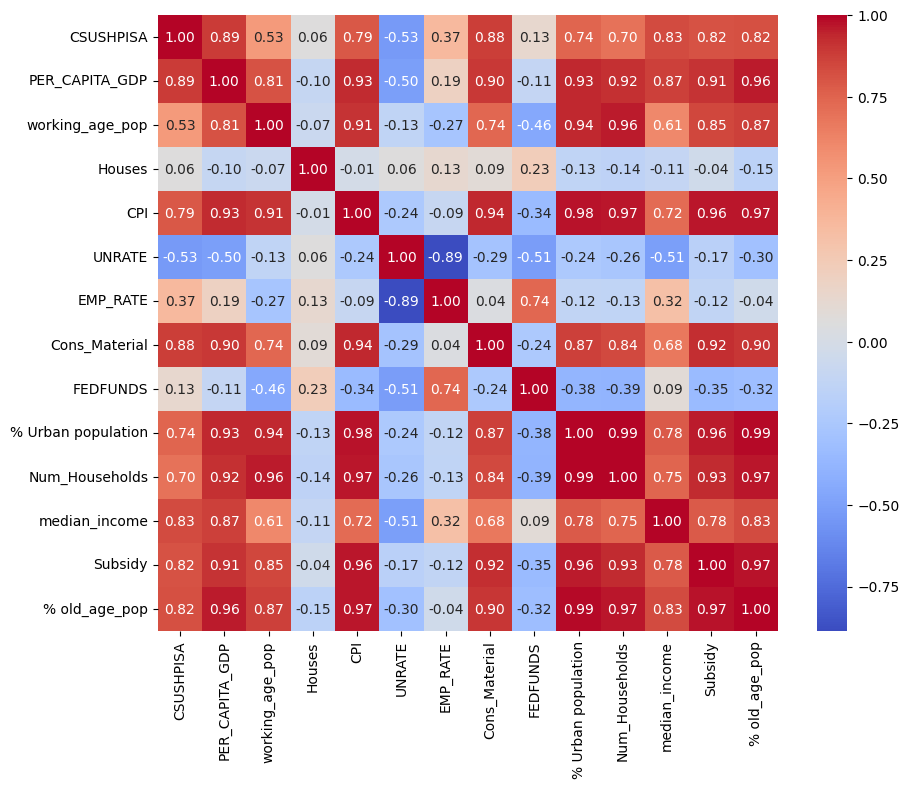

In [ ]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Time Series Analysis

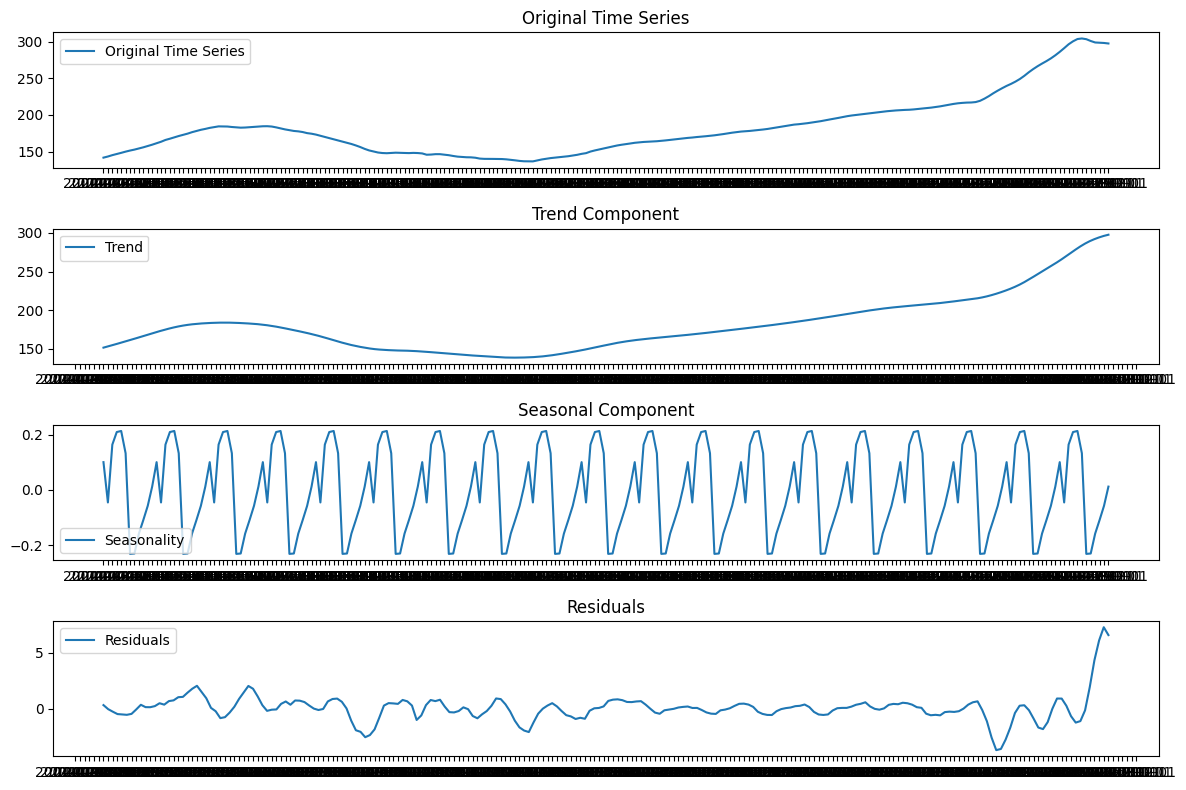

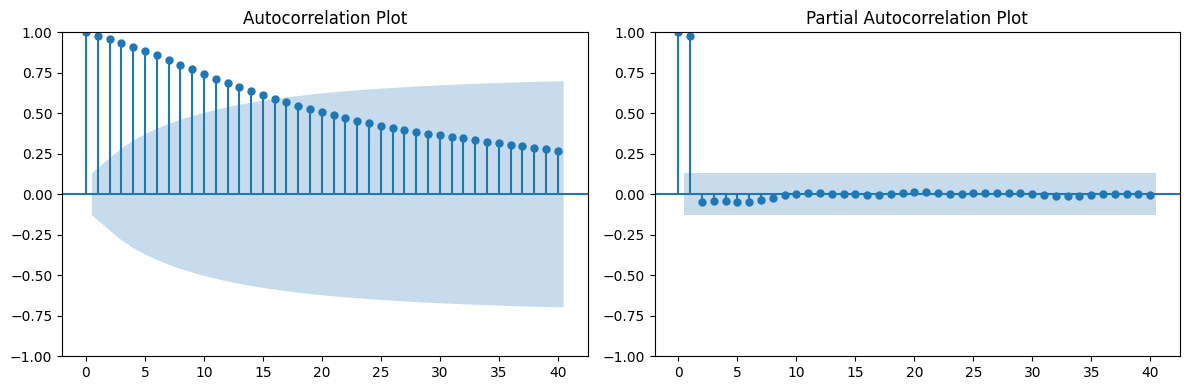

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()




*   The trend component represents the overall trend in home prices.
*  The seasonal component captures any recurring patterns or seasonality.

*   The seasonal component captures any recurring patterns or seasonality.








Data Visualization

<Figure size 1300x800 with 0 Axes>

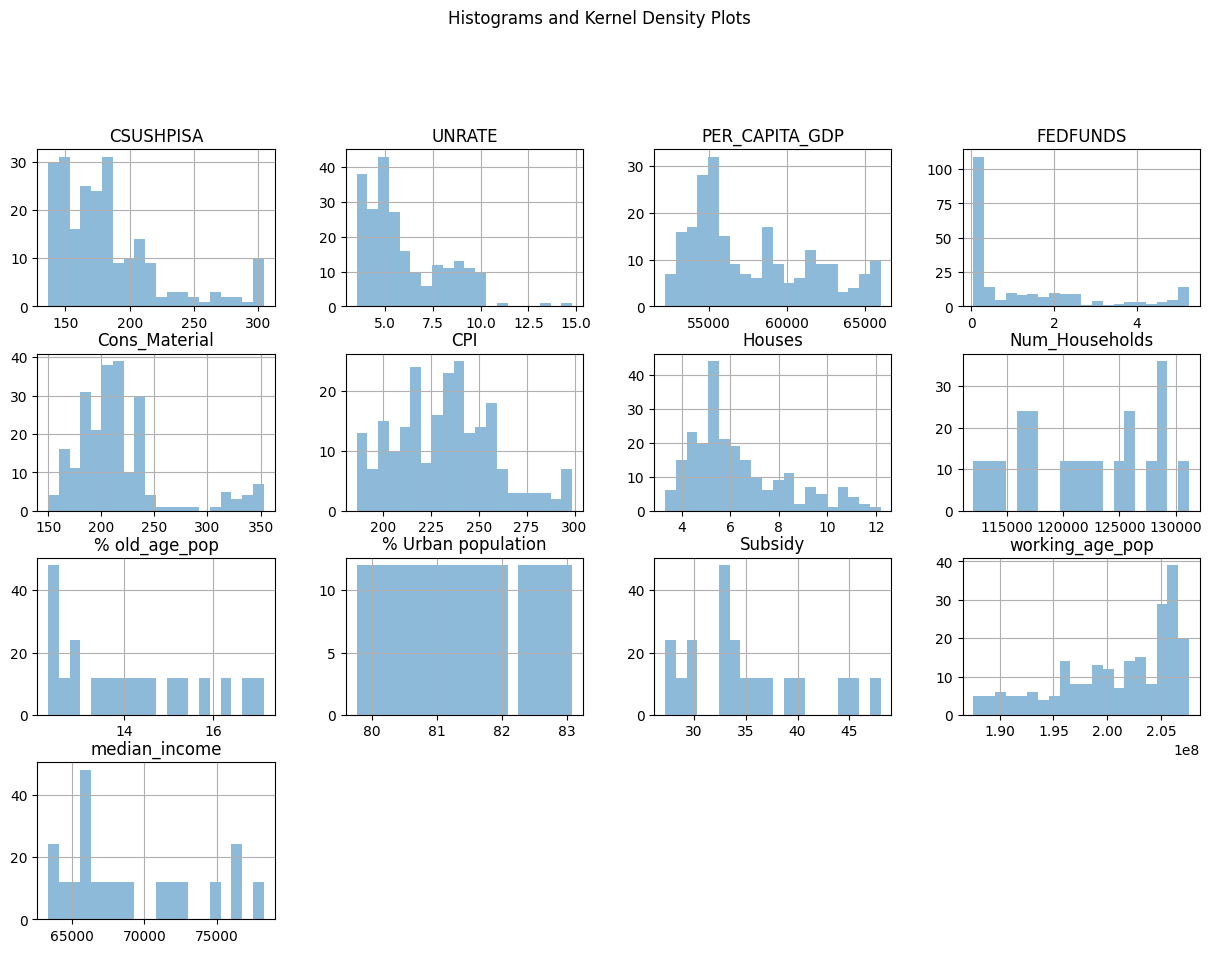

In [ ]:
#Histograms and Kernel Density Plots
factors = ['CSUSHPISA', 'UNRATE', 'PER_CAPITA_GDP', 'FEDFUNDS', 'Cons_Material', 'CPI', 'Houses', 'Num_Households', '% old_age_pop', '% Urban population', 'Subsidy', 'working_age_pop', 'median_income']
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

Extract features and target

In [ ]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

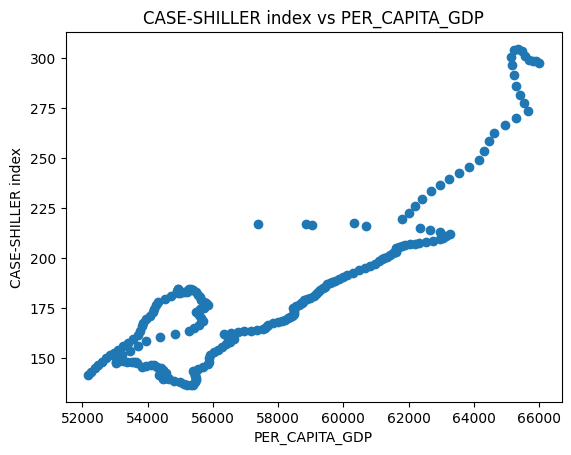

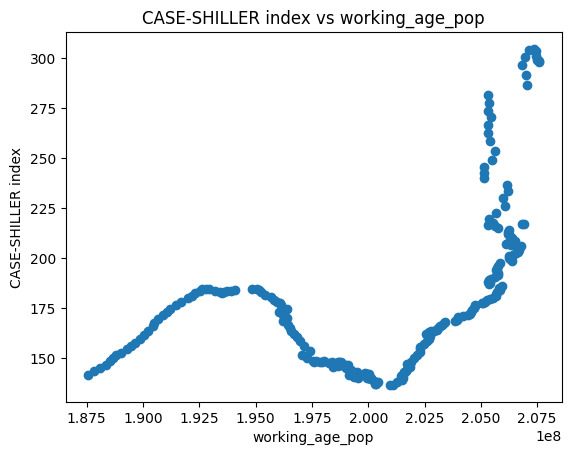

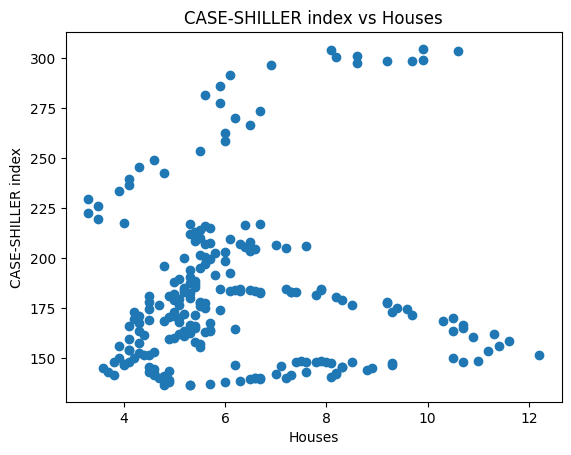

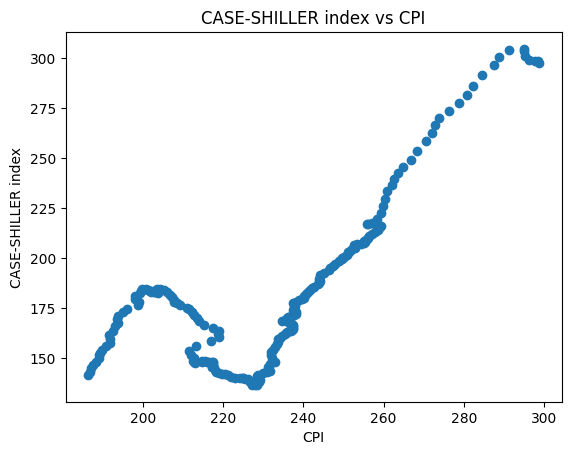

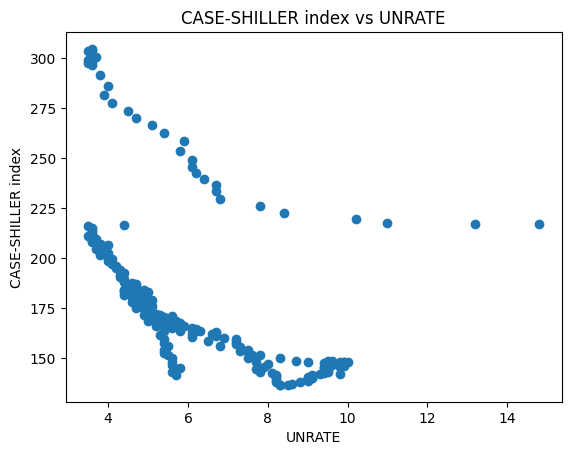

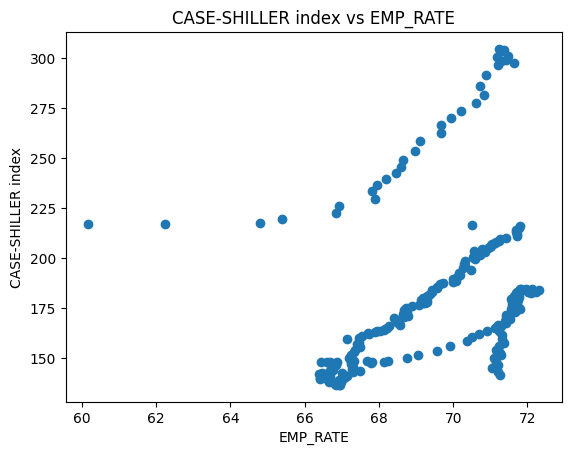

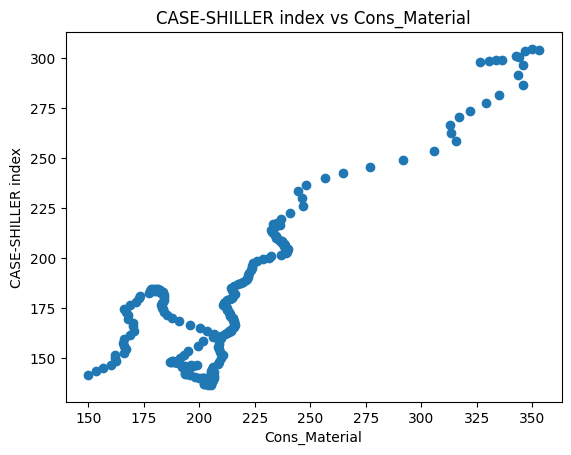

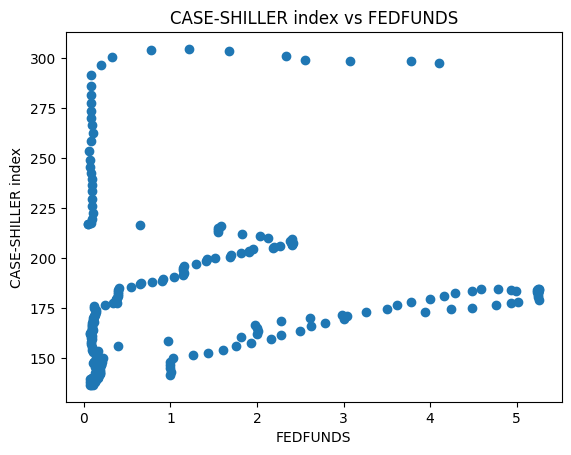

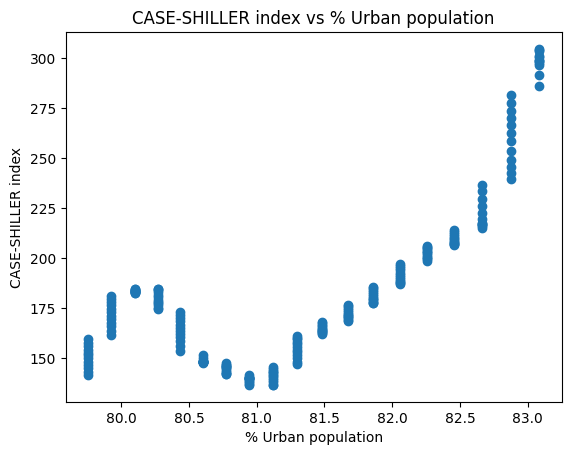

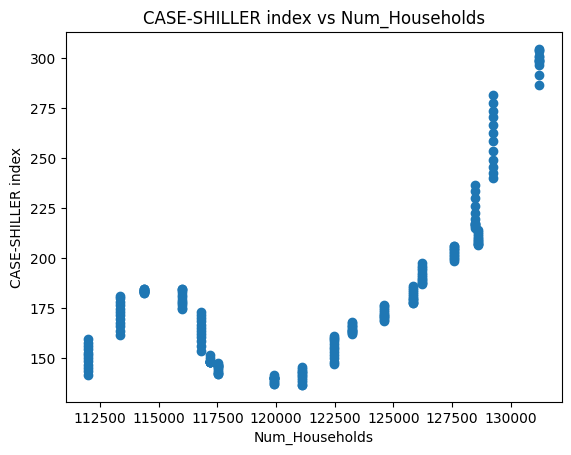

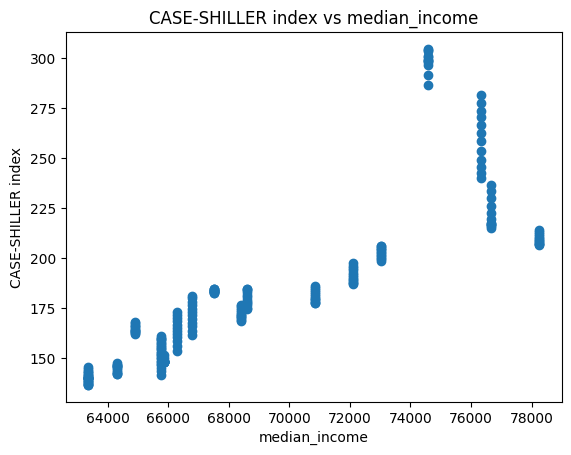

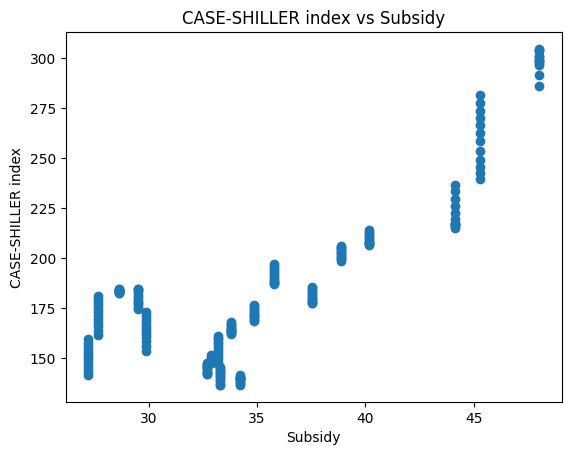

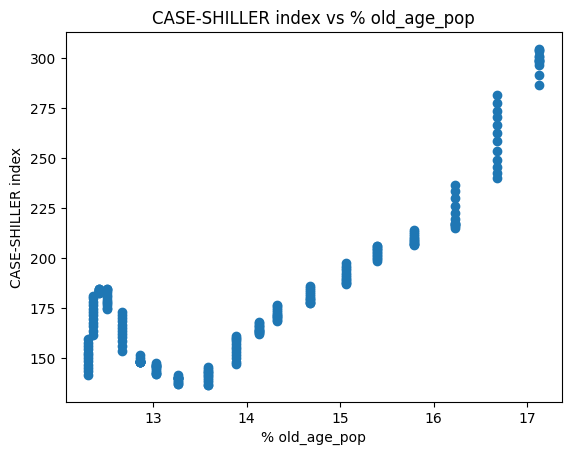

In [ ]:
# Plotting scatter plots of the CASE-SHILLER index vs features
for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

Calculate correlation coefficients

In [ ]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Houses                0.057325
FEDFUNDS              0.133692
EMP_RATE              0.365367
working_age_pop       0.525305
UNRATE                0.526177
Num_Households        0.695859
% Urban population    0.744169
CPI                   0.788705
Subsidy               0.815287
% old_age_pop         0.821203
median_income         0.832737
Cons_Material         0.881160
PER_CAPITA_GDP        0.889292
dtype: float64


Models building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [ ]:
#drop the columns which has lower correlation with the target.
mult_cols = ["working_age_pop", "Houses", "% Urban population", "Num_Households", "UNRATE", "EMP_RATE", "FEDFUNDS"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df
X

,PER_CAPITA_GDP,CPI,Cons_Material,median_income,Subsidy,% old_age_pop
DATE,,,,,,
2004-01-01,52179.000000,186.300,150.000,65760.0,27.201,12.304719
2004-02-01,52275.666667,186.700,153.400,65760.0,27.201,12.304719
2004-03-01,52372.333333,187.100,156.500,65760.0,27.201,12.304719
2004-04-01,52469.000000,187.400,160.100,65760.0,27.201,12.304719
2004-05-01,52591.000000,188.200,162.700,65760.0,27.201,12.304719
...,...,...,...,...,...,...
2022-08-01,65579.000000,295.209,342.753,74580.0,48.021,17.128121
2022-09-01,65689.000000,296.341,336.464,74580.0,48.021,17.128121
2022-10-01,65799.000000,297.863,333.796,74580.0,48.021,17.128121


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model: Linear Regression
Mean Squared Error: 111.84096629447063
R-squared: 0.9393875032477359
Coefficients:
PER_CAPITA_GDP: 23.593583822669697
CPI: -28.339383866863237
Cons_Material: 41.644487779984
median_income: 16.390924719875343
Subsidy: 5.016330364018088
% old_age_pop: -18.47518341949402
Intercept: 182.56314835164827

Model: ElasticNet
Mean Squared Error: 337.6805674718483
R-squared: 0.8169931557520705
Coefficients:
PER_CAPITA_GDP: 7.457158066252765
CPI: 1.7485265617379113
Cons_Material: 9.875392963528322
median_income: 9.241391629190199
Subsidy: 3.203833604663735
% old_age_pop: 2.5840039839573685
Intercept: 182.56314835164832

Model: Random Forest
Mean Squared Error: 4.298728134221707
R-squared: 0.9976702933307251
Feature Importance Analysis:
PER_CAPITA_GDP: 0.05059620533536868
CPI: 0.36965482931340515
Cons_Material: 0.2743059167029096
median_income: 0.16609314714171008
Subsidy: 0.08653902371912098
% old_age_pop: 0.05281087778748551

Model: Gradient Boosting
Mean Squared Error: 4

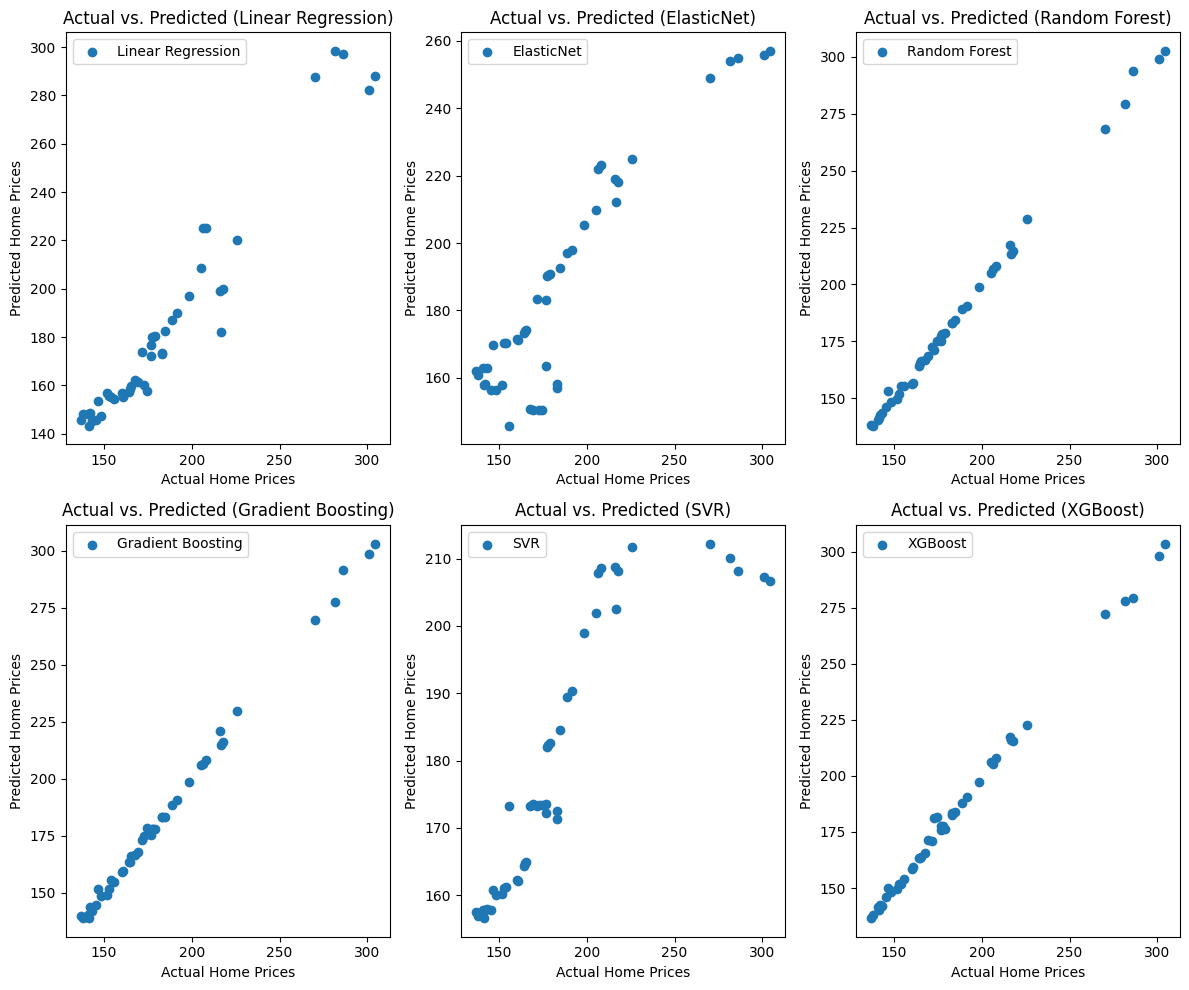


Best Model: RandomForestRegressor with MSE: 4.298728134221707


In [ ]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")

        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model

    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

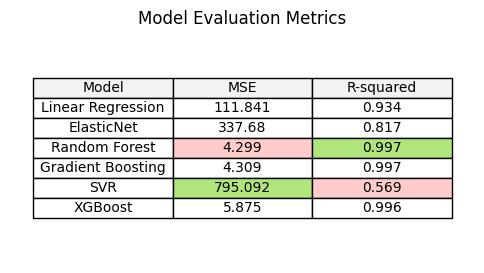

In [ ]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [111.841, 337.680, 4.299,4.309, 795.092, 5.875],
    'R-squared': [0.934,0.817,0.997,0.997,0.569,0.996]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3))

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

Model Analysis:

Linear Regression shows a moderate mean squared error (MSE) and a high R-squared value, indicating a decent predictive accuracy and explanatory power. However, the MSE is higher compared to some other models.

ElasticNet has a relatively high MSE and a lower R-squared value compared to other models, indicating potential limitations in predictive accuracy.

Random Forest shows a very low MSE and a very high R-squared value, indicating excellent predictive accuracy and explanatory power. This model is one of the strongest contenders.

Gradient Boosting also has a very low MSE and a very high R-squared value, similar to Random Forest. It is also a strong contender with excellent performance metrics.

SVR has the highest MSE and the lowest R-squared value among all models, indicating the lowest performance in terms of predictive accuracy and explanatory power.

XGBoost shows a very low MSE and a very high R-squared value, making it another strong contender similar to Random Forest and Gradient Boosting.

Decision:

Champion Model: Random Forest

Low MSE: The Random Forest model has one of the lowest MSE values, indicating that its predictions are very close to the actual values on average. This suggests high predictive accuracy.
High R-squared: The Random Forest model has a very high R-squared value, indicating that it explains a significant portion of the variance in home prices. This suggests strong explanatory power.

Conclusion:
Based on the provided metrics, the Random Forest model is a strong candidate for the best model, with both a low MSE and a high R-squared value. Gradient Boosting and XGBoost also perform exceptionally well and could be considered strong alternatives.